(ref:lec5:ex3_sol)=
# Solutions of Exercise 5.3

```{figure} res/ex2-block.svg
---
width: 600px
name: fig:lec5:ex3_sol:block
---
Block diagram of the control system
```

The proportional feedback controller $F(s) = 4$ was designed assuming that the system $G^0(s)$ was identical to the model, $G(s) = \frac{1}{s(s+1)}$. 

The real system, however, is 

$$
G^0(s) = G(s) \frac{\alpha}{s+\alpha}, \quad \text{where } \alpha > 0
$$

The control loop is closed as in {numref}`fig:lec5:ex3_sol:block`.

1. Compute the **real** closed-loop transfer function $G_c^0(s)$, and use the Routh-Hurwitz criterion to establish for what values of $\alpha$ this transfer function is stable.
2. Find the multiplicative uncertainty $\Delta(s)$ that captures the plant-model mismatch.
3. Using the Bode plot of the nominal complementary sensitivity $T(s)$ in {numref}`fig:lec5:ex3_sol:bode`, apply the "Criterion for robustness to model mismatch" (Criterion 6.2) to find for what values of $\alpha$ the robustness can be guaranteed.
4. Comment the (possible) differences in the solutions to question 1 and question 3.

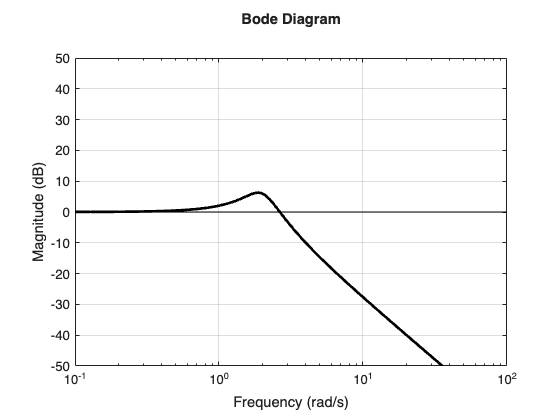

In [15]:
set(groot, 'defaultLineLineWidth', 2);

G = tf(1, [1, 1, 0]);
F = 4;
Go = F * G;
T = Go / (1 + Go);

figure;
bodemag(T, 'k'); hold on;
ylim([-50, 50])
plot([0.1, 100], [0, 0], 'k', 'LineWidth', 0.5);
grid on;

---

## Solution


### Question 1

To compute the real closed-loop transfer function, we start by computing the real open-loop one:

$$
G_o^0(s) = F(s) G^0(s) = 4 \frac{1}{s(s+1)} \frac{\alpha}{s + \alpha} = \frac{4\alpha}{s(s+1)(s+\alpha)}
$$

The real closed-loop transfer function is then

$$
G_c^0(s) = \frac{G_o^0(s)}{1+G^0_o(s)} = \frac{4 \alpha}{s^3 + (\alpha + 1) s^2 + \alpha s + 4 \alpha}
$$

Because it's a third-order system, the poles cannot be explicitly computed. We therefore use the Routh-Hurwitz criterion on the characterist polynomial 

$$
\Phi(s) = s^3 + (\alpha + 1) s^2 + \alpha s + 4 \alpha
$$

The Routh table reads

$
\begin{array}{cc}
1 & \alpha \\
\alpha + 1 & 4 \alpha \\
\hline
c_0 \\ 
d_0
\end{array} \qquad \text{ where } c_0 = \frac{\alpha(\alpha + 1) - 4\alpha}{\alpha + 1} = \frac{\alpha^2 - 3\alpha}{\alpha + 1} \text{ and } d_0 = \frac{c_0 \cdot 4\alpha}{c_0} = 4 \alpha
$

We then set all the elements of the first column to be positive 

$$
\begin{dcases}
1 > 0 & \\
\alpha + 1 > 0 &  \\
\frac{\alpha^2 - 3 \alpha}{\alpha + 1} > 0 \quad & \text{(C)}\\
4 \alpha > 0 &
\end{dcases}
$$ (eq:lec5:ex3_sol:intervals)

To solve inequality (C), we apply the rule of signs by understanding when the numberator and denominator are both positive/negative

Numerator > 0 gives:
$$
\alpha^2 - 3 \alpha > 0 \qquad \Rightarrow \qquad \alpha < 0 \cup \alpha > 3
$$

Denominator > 0 gives:
$$
\alpha > -1
$$

Then we get the following table, from which it is evident that the solution is $-1 < \alpha < 0 \cup \alpha > 3$. The first interval needs to be discarded, because according to the text of the exercise $\alpha$ must be positive. 

```{figure} res/ex3-sign.svg
---
height: 170px
name: fig:lec5:ex3_sol:sign
---
```

Reconstructing {eq}`eq:lec5:ex3_sol:intervals` we get

$$
\begin{dcases}
\forall \alpha \\
\alpha > -1 \\
\alpha > 3  \quad & \text{(C)} \\
\alpha > 0
\end{dcases}
$$

The solutions is $\boxed{\alpha > 3}$.

### Question 2

The multiplicative uncertainty $\Delta(s)$ is such that

$$
G^0(s) = G(s) \left( 1 + \Delta(s) \right)
$$

Replacing the definition of $G^0(s)$ and $G(s)$ we get

$$
\cancel{\frac{1}{s(s+1)}} \frac{\alpha}{s+\alpha} = \cancel{\frac{1}{s(s+1)}} \left( 1 + \Delta(s) \right)
$$

Isolating $\Delta(s)$, we get

$$
\Delta(s) = \frac{\alpha}{s+\alpha} - 1 = \boxed{-\frac{s}{s+\alpha}}
$$


### Question 3

To apply the Robustness Criterion, we need to plot $\lvert \Delta(i \omega) \lvert_{\text{dB}}$ and then mirror it with respect to the 0dB axis to get $-\lvert \Delta(i \omega) \lvert_{\text{dB}}$.

The (asymptotic) Bode plot we note that
- $\Delta(s)$ has a zero in $s = 0$, so the initial slope will be $+20$ dB/decade;
- $\Delta(s)$ has a pole in $s=-\alpha$, therefore for $\omega > \alpha$ the asymptotic magnitude plot will be flat ($0$ dB/decade) 
- $\lim_{s \to \infty} \lvert \Delta(s) \lvert  = 1 = 0$ dB 

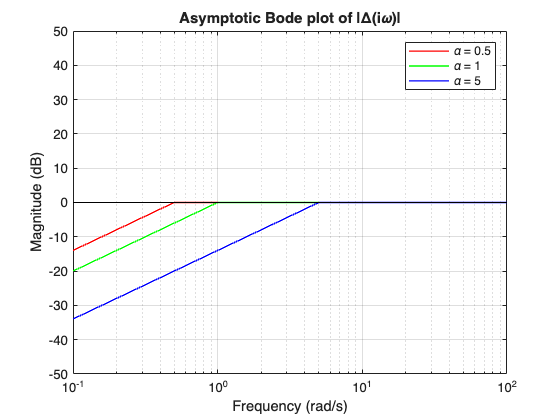

In [25]:
function [w, mag] = sketch_bode_Delta(alpha)
    w = [0.1, alpha, 100];
    low_w_mag = 20*log10(0.1 / alpha);
    mag = [low_w_mag, 0, 0];
end

[w1, mag1] = sketch_bode_Delta(0.5);
[w2, mag2] = sketch_bode_Delta(1);
[w3, mag3] = sketch_bode_Delta(5);
[w4, mag4] = sketch_bode_Delta(4);

figure; hold on; box on; grid on;
plot(w1, mag1, 'r', 'LineWidth', 1);
plot(w2, mag2, 'g', 'LineWidth', 1);
plot(w3, mag3, 'b', 'LineWidth', 1);
xlim([0.1, 100]);
ylim([-50, 50]);
plot([0.1, 100], [0, 0], 'k', 'LineWidth', 0.5);
xscale('log');
xlabel('Frequency (rad/s)');
ylabel('Magnitude (dB)');
legend('\alpha = 0.5', '\alpha = 1', '\alpha = 5');
title('Asymptotic Bode plot of |\Delta(i\omega)|');


Let's now sketch $-\lvert \Delta(i \omega)\lvert_{\text{dB}}$ on top of {numref}`fig:lec5:ex3_sol:bode`

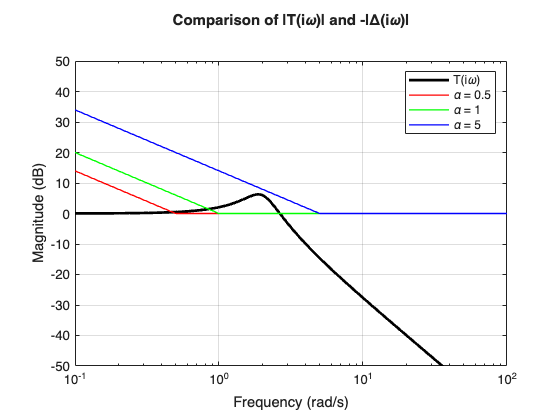

In [21]:
figure;
bodemag(T, 'k'); hold on; grid on;
ylim([-50, 50])
plot(w1, -mag1, 'r', 'LineWidth', 1);
plot(w2, -mag2, 'g', 'LineWidth', 1);
plot(w3, -mag3, 'b', 'LineWidth', 1);
title('Comparison of |T(i\omega)| and -|\Delta(i\omega)|');
legend('T(i\omega)', '\alpha = 0.5', '\alpha = 1', '\alpha = 5');

We can clearly see that for $\alpha = 0.5$ and $\alpha = 1$ the plot $-\lvert \Delta(i \omega) \lvert_{\text{dB}}$ is *not always* higher than $\lvert T(i \omega) \lvert_{\text{dB}}$. For $\alpha = 5$, instead, there is still some room for ($-\lvert \Delta(i \omega) \lvert_{\text{dB}}$  is not tangent!). Let's try to reduce $\alpha$ to $4$.

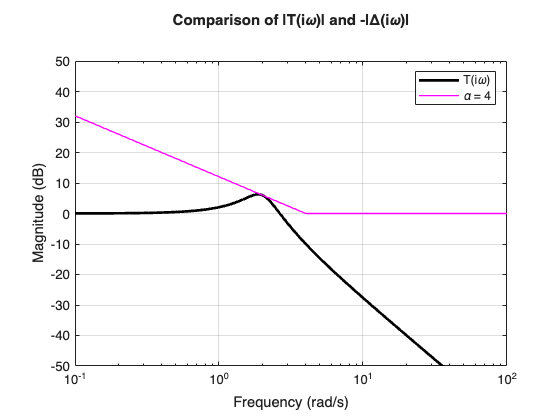

In [26]:
figure;
bodemag(T, 'k'); hold on; grid on;
ylim([-50, 50])
plot(w4, -mag4, 'm', 'LineWidth', 1);
title('Comparison of |T(i\omega)| and -|\Delta(i\omega)|');
legend('T(i\omega)', '\alpha = 4');

From here, we can see that robust closed-loop stability is achieved for any $\boxed{\alpha > 4}$

### Question 4

There is, indeed, a difference between the solution of Question 1 ($\alpha > 3$) and the solution of Question 3 ($\alpha > 4$). The reason for this difference is that Criterion 6.2 is **only a sufficient condition**. This means that:

- If Criterion 6.2 is satisfied, than robust closed-loop stability is guaranteed;
- If Criterion 6.2 is violated, we can not exclude closed-loop stability.

In other words, Criterion 6.2 is **conservative** and does not entitle us to claim that the real closed-loop is unstable for $\alpha < 4$.